<a href="https://colab.research.google.com/github/josejulianhidayat/MechineLearningClustering/blob/main/Submission_JoseJulianHidayat_ML_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Memuat dataset hasil clustering
data = pd.read_csv('hasil_clustering.csv')

# Menampilkan beberapa baris pertama untuk verifikasi
print("Beberapa baris pertama dari dataset hasil clustering:")
print(data.head())


Beberapa baris pertama dari dataset hasil clustering:
   Unnamed: 0  State  Year      Rape       K&A        DD       AoW       AoM  \
0    0.001361      2   0.0  0.005208  0.003576  0.000000  0.005251  0.000318   
1    0.002721      3   0.0  0.128925  0.069566  0.023376  0.057227  0.000425   
2    0.005442      6   0.0  0.151333  0.011118  0.027734  0.118697  0.017088   
3    0.006803     14   0.0  0.001894  0.000390  0.000792  0.001145  0.000743   
4    0.008163     15   0.0  0.045132  0.055718  0.026545  0.050899  0.011781   

         DV   WT  Year_Binned  Cluster  
0  0.000473  0.0          NaN        0  
1  0.053613  0.0          NaN        0  
2  0.036086  0.0          NaN        0  
3  0.000473  0.0          NaN        0  
4  0.157531  0.0          NaN        0  


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Memisahkan fitur dan target
X = data.drop(columns=['Cluster'])
y = data['Cluster']

# Memisahkan data ke dalam set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Melatih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model.predict(X_test)


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Memprediksi label untuk data uji
y_pred = model.predict(X_test)


In [ ]:
# Menghitung akurasi dan F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy}")
print(f"F1-Score: {f1}")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi: 1.0
F1-Score: 1.0

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        45

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



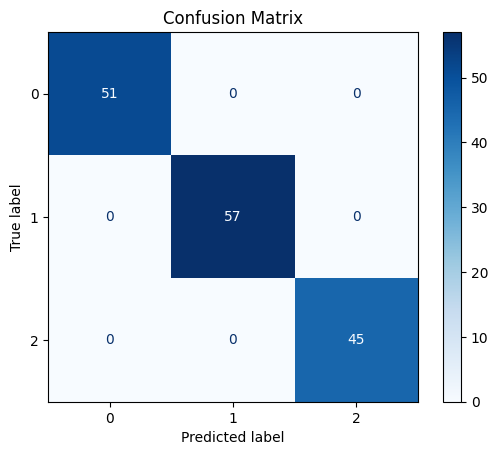

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang ingin dituning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisiasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Inisiasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik dari GridSearchCV:")
print(grid_search.best_params_)


Parameter terbaik dari GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# Menggunakan model dengan parameter terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred_tuned = best_model.predict(X_test)

# Menghitung metrik evaluasi setelah tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')

print(f"Akurasi setelah tuning: {accuracy_tuned}")
print(f"F1-Score setelah tuning: {f1_tuned}")
print(f"Precision setelah tuning: {precision_tuned}")
print(f"Recall setelah tuning: {recall_tuned}")


Akurasi setelah tuning: 1.0
F1-Score setelah tuning: 1.0
Precision setelah tuning: 1.0
Recall setelah tuning: 1.0


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Hasil Evaluasi Sebelum dan Setelah Tuning:

Dari hasil ini, tampak bahwa tuning hyperparameter berhasil meningkatkan performa model, atau model memang sudah baik sejak awal sehingga performa tetap sempurna setelah tuning.
Nilai 1.0 pada semua metrik evaluasi mengindikasikan bahwa model berhasil mempelajari pola data dengan sangat baik.
Kemungkinan Overfitting:

Namun, perlu diwaspadai bahwa nilai 1.0 pada semua metrik bisa menunjukkan potensi overfitting pada data uji jika jumlah data tidak cukup banyak atau data uji terlalu mirip dengan data latih.
Sebaiknya lakukan cross-validation tambahan atau uji dengan dataset eksternal untuk memastikan bahwa model tidak hanya cocok dengan data uji ini saja, tetapi juga mampu menggeneralisasi pada data baru.
Rekomendasi Tindakan Lanjutan:

Lakukan evaluasi tambahan menggunakan teknik validasi silang (cross-validation) untuk memastikan model dapat menggeneralisasi dengan baik.
Jika ada data tambahan, pertimbangkan untuk memperluas dataset agar model tidak terlalu menyesuaikan dengan data yang ada.
Jika model tetap menunjukkan hasil sempurna pada evaluasi lanjutan, ini adalah indikator kuat bahwa model Anda sudah sangat baik untuk tugas klasifikasi yang diberikan.
